In [90]:
# Dependencies

# Data manipulation libraries
import pandas as pd
import numpy as np

# Machine learning libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Technical indicator library
import talib as ta

# Data import library
import yfinance as yf

# Data visualisation
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

# Misc
from datetime import datetime as dt

In [51]:
df = yf.download('TSLA' ,period = '1d', interval = '1m')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-02-02 09:30:00-05:00,928.179993,928.507019,921.250000,924.549927,924.549927,888149
2022-02-02 09:31:00-05:00,924.549927,925.022827,921.250000,923.400696,923.400696,79057
2022-02-02 09:32:00-05:00,924.200012,924.489990,917.119995,920.000000,920.000000,146045
2022-02-02 09:33:00-05:00,920.239990,921.369995,917.550110,920.310120,920.310120,100976
2022-02-02 09:34:00-05:00,920.099976,924.500000,919.179993,924.440002,924.440002,125673
...,...,...,...,...,...,...
2022-02-02 14:29:00-05:00,902.419983,903.130005,902.057007,902.809998,902.809998,13032
2022-02-02 14:30:00-05:00,902.799988,904.455994,902.799988,903.729980,903.729980,35431
2022-02-02 14:31:00-05:00,903.370117,903.783386,902.729980,902.729980,902.729980,17188


In [52]:
# Set up traces
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                    open=df['Open'],
                                    high=df['High'],
                                    low=df['Low'],
                                    close=df['Close'])])

# add titles
fig.update_layout(
    title = 'Tesla Price',
    yaxis_title = 'Stock Price (USD per Share)')

# X Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="30m", step="minute", stepmode="backward"),
            dict(count=6, label="90m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(step="all")
        ])
    )
)

# Display graph
fig.show()

In [53]:
# drop rows with 0 trading volume
df = df.drop(df[df['Volume'] == 0].index)

In [54]:
# create RSI column
n = 10
df['RSI'] = ta.RSI(np.array(df['Close'].shift(1)), timeperiod=n)
df

,Open,High,Low,Close,Adj Close,Volume,RSI
Datetime,,,,,,,
2022-02-02 09:30:00-05:00,928.179993,928.507019,921.250000,924.549927,924.549927,888149,NaN
2022-02-02 09:31:00-05:00,924.549927,925.022827,921.250000,923.400696,923.400696,79057,NaN
2022-02-02 09:32:00-05:00,924.200012,924.489990,917.119995,920.000000,920.000000,146045,NaN
2022-02-02 09:33:00-05:00,920.239990,921.369995,917.550110,920.310120,920.310120,100976,NaN
2022-02-02 09:34:00-05:00,920.099976,924.500000,919.179993,924.440002,924.440002,125673,NaN
...,...,...,...,...,...,...,...
2022-02-02 14:28:00-05:00,901.650024,902.744995,901.650024,902.359985,902.359985,23295,37.695647
2022-02-02 14:29:00-05:00,902.419983,903.130005,902.057007,902.809998,902.809998,13032,42.729308
2022-02-02 14:30:00-05:00,902.799988,904.455994,902.799988,903.729980,903.729980,35431,46.003536


In [55]:
# add RSI to plotly figure
fig = make_subplots(rows=2, cols=1, row_heights=[0.7, 0.3])

fig.add_trace(go.Candlestick(x=df.index,
                            open=df['Open'],
                            high=df['High'],
                            low=df['Low'],
                            close=df['Close'], name = 'market_data'),
             row=1, col=1)

fig.update_xaxes(
    rangeslider_visible=False)

fig.add_trace(go.Scatter(x=df.index,
                    y=df['RSI'], name = 'RSI', line=dict(color='royalblue', width=1.2)),
             row=2, col=1)

fig.show()

In [56]:
# Create a column by name, SMA and assign the SMA calculation to it
df['SMA'] = df['Close'].shift(1).rolling(window=n).mean()

# Create a column by name, Corr and assign the calculation of correlation to it
df['Corr'] = df['Close'].shift(1).rolling(window=n).corr(df['SMA'].shift(1))

# Create a column by name, SAR and assign the SAR calculation to it
df['SAR'] = ta.SAR(np.array(df['High'].shift(1)), np.array(df['Low'].shift(1)),
                   0.2, 0.2)

# Create a column by name, ADX and assign the ADX calculation to it
df['ADX'] = ta.ADX(np.array(df['High'].shift(1)), np.array(df['Low'].shift(1)),
                   np.array(df['Open']), timeperiod=n)

df

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,Corr,SAR,ADX
Datetime,,,,,,,,,,,
2022-02-02 09:30:00-05:00,928.179993,928.507019,921.250000,924.549927,924.549927,888149,NaN,NaN,NaN,NaN,NaN
2022-02-02 09:31:00-05:00,924.549927,925.022827,921.250000,923.400696,923.400696,79057,NaN,NaN,NaN,NaN,NaN
2022-02-02 09:32:00-05:00,924.200012,924.489990,917.119995,920.000000,920.000000,146045,NaN,NaN,NaN,925.022827,NaN
2022-02-02 09:33:00-05:00,920.239990,921.369995,917.550110,920.310120,920.310120,100976,NaN,NaN,NaN,925.022827,NaN
2022-02-02 09:34:00-05:00,920.099976,924.500000,919.179993,924.440002,924.440002,125673,NaN,NaN,NaN,925.022827,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-02 14:28:00-05:00,901.650024,902.744995,901.650024,902.359985,902.359985,23295,37.695647,902.808386,0.779137,902.770912,22.537934
2022-02-02 14:29:00-05:00,902.419983,903.130005,902.057007,902.809998,902.809998,13032,42.729308,902.759387,0.820659,900.000000,22.525065
2022-02-02 14:30:00-05:00,902.799988,904.455994,902.799988,903.729980,903.729980,35431,46.003536,902.482385,0.669938,900.548999,21.839328


In [57]:
# Create columns high, low and close with previous minute's OHLC data
df['Prev_High'] = df['High'].shift(1)
df['Prev_Low'] = df['Low'].shift(1)
df['Prev_Close'] = df['Close'].shift(1)
df

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,Corr,SAR,ADX,Prev_High,Prev_Low,Prev_Close
Datetime,,,,,,,,,,,,,,
2022-02-02 09:30:00-05:00,928.179993,928.507019,921.250000,924.549927,924.549927,888149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-02 09:31:00-05:00,924.549927,925.022827,921.250000,923.400696,923.400696,79057,NaN,NaN,NaN,NaN,NaN,928.507019,921.250000,924.549927
2022-02-02 09:32:00-05:00,924.200012,924.489990,917.119995,920.000000,920.000000,146045,NaN,NaN,NaN,925.022827,NaN,925.022827,921.250000,923.400696
2022-02-02 09:33:00-05:00,920.239990,921.369995,917.550110,920.310120,920.310120,100976,NaN,NaN,NaN,925.022827,NaN,924.489990,917.119995,920.000000
2022-02-02 09:34:00-05:00,920.099976,924.500000,919.179993,924.440002,924.440002,125673,NaN,NaN,NaN,925.022827,NaN,921.369995,917.550110,920.310120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-02 14:28:00-05:00,901.650024,902.744995,901.650024,902.359985,902.359985,23295,37.695647,902.808386,0.779137,902.770912,22.537934,902.304016,901.349976,901.693787
2022-02-02 14:29:00-05:00,902.419983,903.130005,902.057007,902.809998,902.809998,13032,42.729308,902.759387,0.820659,900.000000,22.525065,902.744995,901.650024,902.359985
2022-02-02 14:30:00-05:00,902.799988,904.455994,902.799988,903.729980,903.729980,35431,46.003536,902.482385,0.669938,900.548999,21.839328,903.130005,902.057007,902.809998


In [58]:
# Create columns 'OO' with the difference between the current minute's open and last minute's open
df['OO'] = df['Open']-df['Open'].shift(1)

# Create columns 'OC' with the difference between the current minute's open and last minute's close
df['OC'] = df['Open']-df['Prev_Close']
df

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,Corr,SAR,ADX,Prev_High,Prev_Low,Prev_Close,OO,OC
Datetime,,,,,,,,,,,,,,,,
2022-02-02 09:30:00-05:00,928.179993,928.507019,921.250000,924.549927,924.549927,888149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-02 09:31:00-05:00,924.549927,925.022827,921.250000,923.400696,923.400696,79057,NaN,NaN,NaN,NaN,NaN,928.507019,921.250000,924.549927,-3.630066,0.000000
2022-02-02 09:32:00-05:00,924.200012,924.489990,917.119995,920.000000,920.000000,146045,NaN,NaN,NaN,925.022827,NaN,925.022827,921.250000,923.400696,-0.349915,0.799316
2022-02-02 09:33:00-05:00,920.239990,921.369995,917.550110,920.310120,920.310120,100976,NaN,NaN,NaN,925.022827,NaN,924.489990,917.119995,920.000000,-3.960022,0.239990
2022-02-02 09:34:00-05:00,920.099976,924.500000,919.179993,924.440002,924.440002,125673,NaN,NaN,NaN,925.022827,NaN,921.369995,917.550110,920.310120,-0.140015,-0.210144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-02 14:28:00-05:00,901.650024,902.744995,901.650024,902.359985,902.359985,23295,37.695647,902.808386,0.779137,902.770912,22.537934,902.304016,901.349976,901.693787,0.090027,-0.043762
2022-02-02 14:29:00-05:00,902.419983,903.130005,902.057007,902.809998,902.809998,13032,42.729308,902.759387,0.820659,900.000000,22.525065,902.744995,901.650024,902.359985,0.769958,0.059998
2022-02-02 14:30:00-05:00,902.799988,904.455994,902.799988,903.729980,903.729980,35431,46.003536,902.482385,0.669938,900.548999,21.839328,903.130005,902.057007,902.809998,0.380005,-0.010010


In [59]:
# Create a column 'Ret' with the calculation of returns
df['Ret'] = (df['Open'].shift(-1)-df['Open'])/df['Open']

# Create n columns and assign
for i in range(1, n):
    df['return%i' % i] = df['Ret'].shift(i)
    
df

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,Corr,SAR,...,Ret,return1,return2,return3,return4,return5,return6,return7,return8,return9
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-02-02 09:30:00-05:00,928.179993,928.507019,921.250000,924.549927,924.549927,888149,NaN,NaN,NaN,NaN,...,-0.003911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-02 09:31:00-05:00,924.549927,925.022827,921.250000,923.400696,923.400696,79057,NaN,NaN,NaN,NaN,...,-0.000378,-0.003911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-02 09:32:00-05:00,924.200012,924.489990,917.119995,920.000000,920.000000,146045,NaN,NaN,NaN,925.022827,...,-0.004285,-0.000378,-0.003911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-02 09:33:00-05:00,920.239990,921.369995,917.550110,920.310120,920.310120,100976,NaN,NaN,NaN,925.022827,...,-0.000152,-0.004285,-0.000378,-0.003911,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-02 09:34:00-05:00,920.099976,924.500000,919.179993,924.440002,924.440002,125673,NaN,NaN,NaN,925.022827,...,0.004580,-0.000152,-0.004285,-0.000378,-0.003911,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-02 14:28:00-05:00,901.650024,902.744995,901.650024,902.359985,902.359985,23295,37.695647,902.808386,0.779137,902.770912,...,0.000854,0.000100,0.001099,-0.001585,-0.000165,-0.000776,-0.000755,-0.001368,-0.000541,0.001316
2022-02-02 14:29:00-05:00,902.419983,903.130005,902.057007,902.809998,902.809998,13032,42.729308,902.759387,0.820659,900.000000,...,0.000421,0.000854,0.000100,0.001099,-0.001585,-0.000165,-0.000776,-0.000755,-0.001368,-0.000541
2022-02-02 14:30:00-05:00,902.799988,904.455994,902.799988,903.729980,903.729980,35431,46.003536,902.482385,0.669938,900.548999,...,0.000632,0.000421,0.000854,0.000100,0.001099,-0.001585,-0.000165,-0.000776,-0.000755,-0.001368


In [60]:
# Change the value of 'Corr' to -1 if it is less than -1
df.loc[df['Corr'] < -1, 'Corr'] = -1

# Change the value of 'Corr' to 1 if it is greater than 1
df.loc[df['Corr'] > 1, 'Corr'] = 1

# Drop the NaN values
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,Corr,SAR,...,Ret,return1,return2,return3,return4,return5,return6,return7,return8,return9
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-02-02 09:50:00-05:00,914.199890,918.849976,913.438171,918.849976,918.849976,132897,39.310418,916.346661,0.618129,915.847492,...,0.004430,0.002083,-0.001925,0.002555,-0.004096,-0.001570,0.002796,-0.005229,-0.002122,-0.005553
2022-02-02 09:51:00-05:00,918.250000,921.309998,917.830017,921.080017,921.080017,100783,50.572738,915.639160,0.259369,911.200012,...,0.003089,0.004430,0.002083,-0.001925,0.002555,-0.004096,-0.001570,0.002796,-0.005229,-0.002122
2022-02-02 09:52:00-05:00,921.086609,922.500000,919.520020,920.630005,920.630005,102441,54.813108,915.620160,-0.266902,911.200012,...,-0.000843,0.003089,0.004430,0.002083,-0.001925,0.002555,-0.004096,-0.001570,0.002796,-0.005229
2022-02-02 09:53:00-05:00,920.309998,921.739990,919.500000,920.014282,920.014282,77310,53.778643,915.745160,-0.611029,913.222009,...,-0.000016,-0.000843,0.003089,0.004430,0.002083,-0.001925,0.002555,-0.004096,-0.001570,0.002796
2022-02-02 09:54:00-05:00,920.294983,922.200012,919.949707,922.200012,922.200012,51022,52.278701,916.365576,-0.648046,915.077607,...,0.002331,-0.000016,-0.000843,0.003089,0.004430,0.002083,-0.001925,0.002555,-0.004096,-0.001570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-02 14:27:00-05:00,901.559998,902.304016,901.349976,901.693787,901.693787,31464,37.031666,902.916010,0.645390,903.463641,...,0.000100,0.001099,-0.001585,-0.000165,-0.000776,-0.000755,-0.001368,-0.000541,0.001316,0.001385
2022-02-02 14:28:00-05:00,901.650024,902.744995,901.650024,902.359985,902.359985,23295,37.695647,902.808386,0.779137,902.770912,...,0.000854,0.000100,0.001099,-0.001585,-0.000165,-0.000776,-0.000755,-0.001368,-0.000541,0.001316
2022-02-02 14:29:00-05:00,902.419983,903.130005,902.057007,902.809998,902.809998,13032,42.729308,902.759387,0.820659,900.000000,...,0.000421,0.000854,0.000100,0.001099,-0.001585,-0.000165,-0.000776,-0.000755,-0.001368,-0.000541


In [61]:
# Create a variable split that stores 80% of the length of the dataframe
t = .8
split = int(t*len(df))
split

224

In [63]:
pd.options.mode.chained_assignment = None  # default='warn'
# Create a column by name, 'Signal' and initialize with 0
df['Signal'] = 0

# Assign a value of 1 to 'Signal' column for the quantile with the highest returns
df.loc[df['Ret'] > df['Ret'][:split].quantile(q=0.66), 'Signal'] = 1

# Assign a value of -1 to 'Signal' column for the quantile with the lowest returns
df.loc[df['Ret'] < df['Ret'][:split].quantile(q=0.34), 'Signal'] = -1

In [64]:
# Use drop method to drop the columns
X = df.drop(['Close', 'Signal', 'High',
             'Low', 'Volume', 'Ret'], axis=1)

# Create a variable which contains all the 'Signal' values
y = df['Signal']

In [65]:
# Test variables for 'c' and 'g'
#Setting the different values to test within C, Gamma and Kernel
c = [10, 100, 1000, 10000]
g = [1e-2, 1e-1, 1e0]

# Intialise the parameters
parameters = {'svc__C': c,
              'svc__gamma': g,
              'svc__kernel': ['rbf']
              }

#Creating the step by step pipeline
# Create the 'steps' variable with the pipeline functions
steps = [('scaler', StandardScaler()), ('svc', SVC())]

# Pass the 'steps' to the Pipeline function
pipeline = Pipeline(steps)

#Creating a randomized function to help to find the best parameters.
# Call the RandomizedSearchCV function and pass the parameters
rcv = RandomizedSearchCV(pipeline, parameters, cv=TimeSeriesSplit(n_splits=2))

In [66]:
# Call the 'fit' method of rcv and pass the train data to it
rcv.fit(X.iloc[:split], y.iloc[:split])

# Call the 'best_params_' method to obtain the best parameters of C
best_C = rcv.best_params_['svc__C']

# Call the 'best_params_' method to obtain the best parameters of kernel
best_kernel = rcv.best_params_['svc__kernel']

# Call the 'best_params_' method to obtain the best parameters of gamma
best_gamma = rcv.best_params_['svc__gamma']

In [72]:
# instantiate model
cls = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma)

In [74]:
# Train model
ss = StandardScaler()
cls.fit(ss.fit_transform(X.iloc[:split]), y.iloc[:split])

SVC(C=100, gamma=0.01)

In [76]:
# Pass the test data to the predict function and store the values into 'y_predict'
y_predict = cls.predict(ss.transform(X.iloc[split:]))

# Initiate a column by name, 'Pred_Signal' and assign 0 to it
df['Pred_Signal'] = 0

In [77]:
y_predict

array([ 0,  1,  0,  0,  0,  1, -1,  0,  0, -1,  0,  0,  1, -1,  0,  0,  1,
        0, -1,  0, -1,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  1,  0,  0, -1, -1,  0, -1,
        1,  0,  1,  0,  1,  0])

In [79]:
# Save the predicted values for the train data
df.iloc[:split, df.columns.get_loc('Pred_Signal')] = pd.Series(
    cls.predict(ss.transform(X.iloc[:split])).tolist())

# Save the predicted values for the test data
df.iloc[split:, df.columns.get_loc('Pred_Signal')] = y_predict

In [80]:
df

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,Corr,SAR,...,return2,return3,return4,return5,return6,return7,return8,return9,Signal,Pred_Signal
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-02-02 09:50:00-05:00,914.199890,918.849976,913.438171,918.849976,918.849976,132897,39.310418,916.346661,0.618129,915.847492,...,-0.001925,0.002555,-0.004096,-0.001570,0.002796,-0.005229,-0.002122,-0.005553,1,NaN
2022-02-02 09:51:00-05:00,918.250000,921.309998,917.830017,921.080017,921.080017,100783,50.572738,915.639160,0.259369,911.200012,...,0.002083,-0.001925,0.002555,-0.004096,-0.001570,0.002796,-0.005229,-0.002122,1,NaN
2022-02-02 09:52:00-05:00,921.086609,922.500000,919.520020,920.630005,920.630005,102441,54.813108,915.620160,-0.266902,911.200012,...,0.004430,0.002083,-0.001925,0.002555,-0.004096,-0.001570,0.002796,-0.005229,-1,NaN
2022-02-02 09:53:00-05:00,920.309998,921.739990,919.500000,920.014282,920.014282,77310,53.778643,915.745160,-0.611029,913.222009,...,0.003089,0.004430,0.002083,-0.001925,0.002555,-0.004096,-0.001570,0.002796,0,NaN
2022-02-02 09:54:00-05:00,920.294983,922.200012,919.949707,922.200012,922.200012,51022,52.278701,916.365576,-0.648046,915.077607,...,-0.000843,0.003089,0.004430,0.002083,-0.001925,0.002555,-0.004096,-0.001570,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-02 14:27:00-05:00,901.559998,902.304016,901.349976,901.693787,901.693787,31464,37.031666,902.916010,0.645390,903.463641,...,-0.001585,-0.000165,-0.000776,-0.000755,-0.001368,-0.000541,0.001316,0.001385,0,0.0
2022-02-02 14:28:00-05:00,901.650024,902.744995,901.650024,902.359985,902.359985,23295,37.695647,902.808386,0.779137,902.770912,...,0.001099,-0.001585,-0.000165,-0.000776,-0.000755,-0.001368,-0.000541,0.001316,1,1.0
2022-02-02 14:29:00-05:00,902.419983,903.130005,902.057007,902.809998,902.809998,13032,42.729308,902.759387,0.820659,900.000000,...,0.000100,0.001099,-0.001585,-0.000165,-0.000776,-0.000755,-0.001368,-0.000541,0,0.0


In [83]:
# calculate returns
df['Ret1'] = df['Ret'] * df['Pred_Signal']

In [88]:
# backtest
fig = go.Figure()

# set up traces
fig.add_trace(go.Scatter(x=df.index[split:], y=(df['Ret'][split:]+1).cumprod(),line=dict(color='royalblue',width=.8),name='stock_retuns'))
fig.add_trace(go.Scatter(x=df.index[split:], y=(df['Ret1'][split:]+1).cumprod(),line=dict(color='orange',width=.8),name='strategy_returns'))

# add titles
fig.update_layout(
    title='SVM Strategy',
    yaxis_title='Stock return (% Return)')
fig.show()

In [89]:
# calculate confusion matrix
cm = confusion_matrix(y[split:],y_predict)
cm

array([[ 5,  8,  0],
       [ 5, 19,  2],
       [ 0,  8, 10]])

/Users/jcp/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



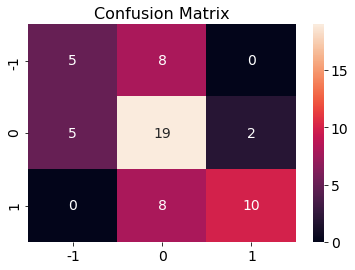

In [93]:
# set params
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted values', fontsize=14)
plt.ylabel('True Values', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams.update({'font.size': 14})

# plot the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

# set the axis
ax.xaxis.set_ticklabels(['-1', '0', '1'])
ax.yaxis.set_ticklabels(['-1', '0', '1'])
plt.show()

In [94]:
cr = classification_report(y[split:], y_predict)
print(cr)

              precision    recall  f1-score   support

          -1       0.50      0.38      0.43        13
           0       0.54      0.73      0.62        26
           1       0.83      0.56      0.67        18

    accuracy                           0.60        57
   macro avg       0.63      0.56      0.57        57
weighted avg       0.62      0.60      0.59        57

